In [1]:
## processing
import numpy as np
import pandas as pd

## custom package
import tregs

## visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 12})

# pboc plotting style
tregs.mpl_pboc.plotting_style()

{'green': '#7AA974',
 'light_green': '#BFD598',
 'pale_green': '#DCECCB',
 'yellow': '#EAC264',
 'light_yellow': '#F3DAA9',
 'pale_yellow': '#FFEDCE',
 'blue': '#738FC1',
 'light_blue': '#A9BFE3',
 'pale_blue': '#C9D7EE',
 'red': '#D56C55',
 'light_red': '#E8B19D',
 'pale_red': '#F1D4C9',
 'purple': '#AB85AC',
 'light_purple': '#D4C2D9',
 'dark_green': '#7E9D90',
 'dark_brown': '#905426'}

### Testing on simulated lacI data

In [2]:
fpath = '../../data/synthetic_datasets/lacI_synthetic_dataset.csv'
df_lacI = pd.read_csv(fpath)
df_lacI.head()

,seq,pbound,ct_0,ct_1,norm_ct_1
0,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.017959,1.0,1.0,1.000000
1,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.034200,8.0,27.0,3.375000
2,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.003546,28.0,10.0,0.357143
3,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.084251,12.0,101.0,8.416667
4,ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAA...,0.065250,1.0,6.0,6.000000


In [3]:
wtseq = 'ACAGGTTTCCCGACTGGAAAGCGGGCAGTGAGCGCAACGCAATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGGAATTGTGAGCGGATAACAATTTCACACAGGAAACAGCTATGACCA'

### Expression shift matrices

In [4]:
def get_expression_shift_matrix(seqs, mu_data, wtseq,
                                len_promoter=160):

    n_seqs = len(seqs)
    avg_mu = np.mean(mu_data)

    def make_int(x):
        dict = {'A': 1, 'C': 2, 'G': 3, 'T': 4}
        return [dict[y] for y in x]

    int_seqs = []
    for i_seq in range(n_seqs):
        seq = seqs[i_seq].upper()
        int_seqs.append(make_int(seq))

    int_wtseq = make_int(wtseq)

    exshift_list = []
    for position in range(len_promoter):
        ex_shift = np.zeros(4)
        for base in range(4):
            if base + 1 != int_wtseq[position]:
                for i_seq in range(n_seqs):
                    int_seq = int_seqs[i_seq]
                    if (int_seq[position] == base + 1):
                        ex_shift[base] += (mu_data[i_seq] - avg_mu) / avg_mu
        ex_shift /= n_seqs
        exshift_list.append(ex_shift)
    
    return np.asarray(exshift_list).T

In [6]:
exshift = get_expression_shift_matrix(df_lacI['seq'].values, df_lacI['norm_ct_1'].values, wtseq)

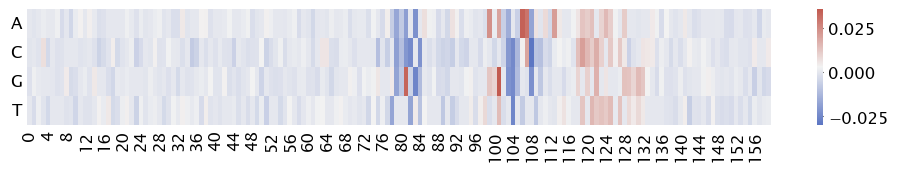

In [10]:
fig, ax = plt.subplots(figsize=(12, 1.5))

div_colors = sns.diverging_palette(258, 16, s=56, l=51, n=15, sep=2, center='light', as_cmap=True)
sns.heatmap(exshift, cmap=div_colors, ax=ax)
ax.set_yticklabels(['A', 'C', 'G', 'T'], rotation=360)
plt.show()

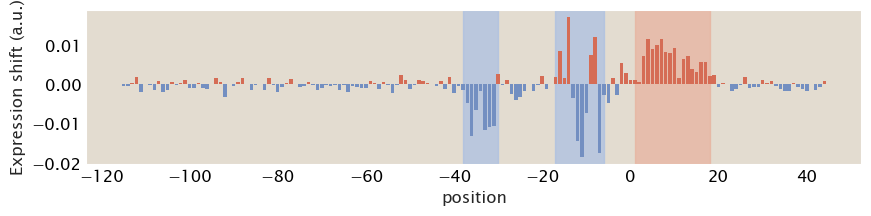

In [9]:
fig, ax = plt.subplots(figsize=(10,2))

ax.axvspan(76 - 114, 84 - 114, alpha=0.7, color='#A9BFE3')
ax.axvspan(97 - 114, 108 - 114, alpha=0.7, color='#A9BFE3')
ax.axvspan(115 - 114, 132 - 114, alpha=0.7, color='#E8B19D')

exshift_list = np.mean(exshift, axis=0)
shiftcolors = [('#D56C55' if exs > 0 else '#738FC1') for exs in exshift_list]
ax.bar(np.arange(len(exshift_list)) - 115, exshift_list, color=shiftcolors, edgecolor=None, linewidth=0)

ax.set_ylabel('Expression shift (a.u.)', fontsize=12)
ax.set_xlabel('position', fontsize=12)
plt.show()